In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#KHAI BÁO THƯ VIỆN
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator, image
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from keras.models import  Sequential

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [ ]:
train_data = '/content/drive/MyDrive/Drive/15_LoaiGo/TRAIN'
test_data =  '/content/drive/MyDrive/Drive/15_LoaiGo/TEST'
val_data  =  '/content/drive/MyDrive/Drive/15_LoaiGo/TEST'

In [ ]:
from keras.engine.data_adapter import train_validation_split
data_scale = ImageDataGenerator(
              rescale=1. / 255,
              shear_range=0.2,
              zoom_range=0.2,
              horizontal_flip=True)
train_input = data_scale.flow_from_directory(train_data,
                        target_size=(120, 120),
                        batch_size=32,
                        class_mode="categorical")
test_input = data_scale.flow_from_directory(test_data,
                        target_size=(120, 120),
                        batch_size=32,
                        class_mode="categorical")
val_input = data_scale.flow_from_directory(val_data,
                        target_size=(120, 120),
                        batch_size=32,
                        class_mode="categorical")

Found 336 images belonging to 15 classes.
Found 336 images belonging to 15 classes.
Found 336 images belonging to 15 classes.


In [ ]:
class_name = ['Anh_dao', 'Bach_dan', 'Cam_xe', 'Cao_su', 'Gu_huong', 'Mit_mat', 'Mun','Mun_soc','Oc_cho', 'Sen_mat', 'Soi','Sua_do','Thong','Thuy_tung','Xa_cu']

In [ ]:
print("labels: ", class_name)
print("match class: ", train_input.class_indices)
print("Tổng cộng các loại gỗ: ",train_input.num_classes)

labels:  ['Anh_dao', 'Bach_dan', 'Cam_xe', 'Cao_su', 'Gu_huong', 'Mit_mat', 'Mun', 'Mun_soc', 'Oc_cho', 'Sen_mat', 'Soi', 'Sua_do', 'Thong', 'Thuy_tung', 'Xa_cu']
match class:  {'Anh Đào': 0, 'Bạch Đàn': 1, 'Cao su': 2, 'Căm xe': 3, 'Gù Hương': 4, 'Mít Mật': 5, 'Mun': 6, 'Mun Sọc': 7, 'Óc chó': 8, 'Sến mật': 9, 'Sồi': 10, 'Sưa đỏ': 11, 'Thông': 12, 'Thủy Tùng': 13, 'Xà Cừ': 14}
Tổng cộng các loại gỗ:  15


In [ ]:
model=Sequential()

#LAYER 1
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(120,120,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 2
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 3
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(15,activation='softmax'))  #15 class_name
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 60, 60, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 60, 60, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(train_input,batch_size=30,epochs=50,verbose=1,validation_data=val_input)

Epoch 1/50
11/11 [==============================] - 170s 17s/step - loss: 9.0600 - accuracy: 0.0893 - val_loss: 2.6890 - val_accuracy: 0.1518
Epoch 2/50
11/11 [==============================] - 23s 2s/step - loss: 2.6828 - accuracy: 0.1220 - val_loss: 2.6522 - val_accuracy: 0.1429
Epoch 3/50
11/11 [==============================] - 24s 2s/step - loss: 2.6570 - accuracy: 0.1250 - val_loss: 2.6504 - val_accuracy: 0.1905
Epoch 4/50
11/11 [==============================] - 24s 2s/step - loss: 2.5572 - accuracy: 0.1935 - val_loss: 2.4958 - val_accuracy: 0.2440
Epoch 5/50
11/11 [==============================] - 23s 2s/step - loss: 2.3327 - accuracy: 0.2054 - val_loss: 2.3247 - val_accuracy: 0.2232
Epoch 6/50
11/11 [==============================] - 24s 2s/step - loss: 2.1344 - accuracy: 0.2321 - val_loss: 2.0391 - val_accuracy: 0.2857
Epoch 7/50
11/11 [==============================] - 23s 2s/step - loss: 2.0057 - accuracy: 0.2619 - val_loss: 1.8919 - val_accuracy: 0.3780
Epoch 8/50
11/11 [

<function matplotlib.pyplot.show>

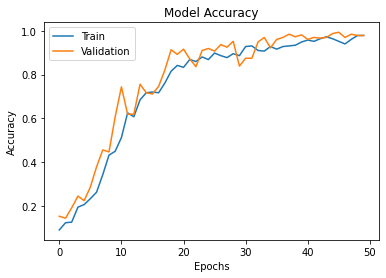

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
%cd "/content/drive/MyDrive/Drive/15_LoaiGo/"

/content/drive/MyDrive/Drive/15_LoaiGo


In [ ]:
%ls

15_LoaiGo.h5  TEST/  TRAIN/  VALIDATION/


In [ ]:
from keras.models import load_model
#model.save('/content/drive/MyDrive/Drive/15_LoaiGo.h5')
model_cnn=load_model('15_LoaiGo.h5')

Loại gỗ:Sồi


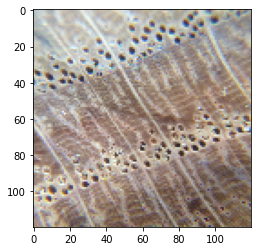

Loại gỗ: Anh Đào


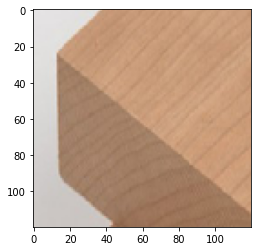

Loại gỗ:Bạch Đàn


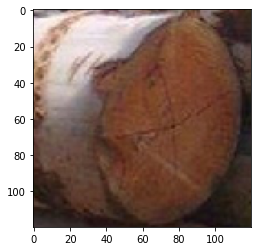

Loại gỗ: Xà cừ


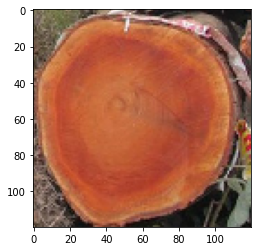

Loại gỗ:Thông


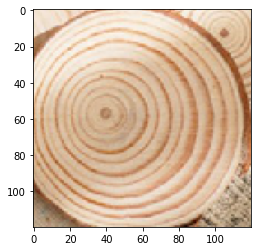

Loại gỗ:Mun sọc


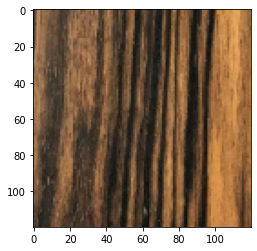

Loại gỗ:Mun


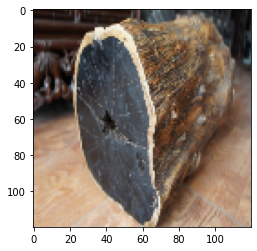

Loại gỗ:Óc chó


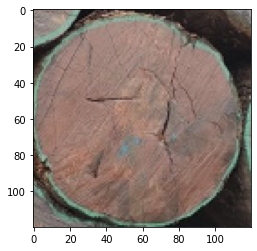

Loại gỗ:Căm xe


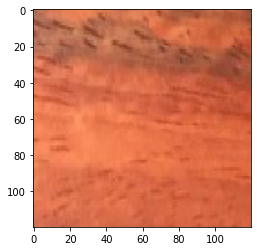

Loại gỗ:Sưa đỏ


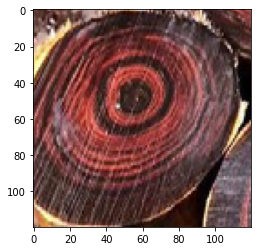

In [ ]:

import os
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
test="/content/drive/MyDrive/Drive/15_LoaiGo/VALIDATION"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(120,120))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_cnn.predict(img)
  if round(result[0][0])==1:
    prediction='Loại gỗ: Anh Đào'
  if round(result[0][1])==1:
    prediction='Loại gỗ:Bạch Đàn'
  if round(result[0][2])==1:
    prediction='Loại gỗ:Cao su'
  if round(result[0][3])==1:
    prediction='Loại gỗ:Căm xe'
  if round(result[0][4])==1:
    prediction='Loại gỗ: Gù hương'
  if round(result[0][5])==1:
    prediction='Loại gỗ:Mít mật'
  if round(result[0][6])==1:
    prediction='Loại gỗ:Mun'
  if round(result[0][7])==1:
    prediction='Loại gỗ:Mun sọc'
  if round(result[0][8])==1:
    prediction='Loại gỗ:Óc chó'
  if round(result[0][9])==1:
    prediction='Loại gỗ:Sến mật'
  if round(result[0][10])==1:
    prediction='Loại gỗ:Sồi'
  if round(result[0][11])==1:
    prediction='Loại gỗ:Sưa đỏ'
  if round(result[0][12])==1:
    prediction='Loại gỗ:Thông'
  if round(result[0][13])==1:
    prediction='Loại gỗ:Thủy tùng'
  if round(result[0][14])==1:
    prediction='Loại gỗ: Xà cừ'

  print(prediction)
  plt.show()

In [ ]:
from IPython.display import display, Javascript, Image
# JavaScript to properly create our live video stream using our webcam as input

def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'Bấm vào video để dừng</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes


In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
from IPython.display import display, Javascript, Image
# JavaScript to properly create our live video stream using our webcam as input

def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'Bấm vào video để dừng</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
%cd /content
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import numpy as np
import PIL
import io
import cv2
from keras.models import  load_model

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Đang lấy hình ảnh...'
# initialze bounding box to empty
bbox = ''
count = 0 

model_file_path = "/content/drive/MyDrive/Drive/15_LoaiGo/15_LoaiGo.h5"
vggmodel = load_model(model_file_path)

classes = ['Anh_dao', 'Bach_dan', 'Cam_xe', 'Cao_su', 'Gu_huong', 'Mit_mat', 'Mun',
           'Mun_soc','Oc_cho', 'Sen_mat', 'Soi','Sua_do','Thong','Thuy_tung','Xa_cu']
while True:
    # Đọc ảnh trả về từ JS
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])

    # Resize để đưa vào model
    frame_p = cv2.resize(frame, dsize=(120,120))
    tensor = np.expand_dims(frame_p, axis=0)

    # Feed vào mạng
    pred = vggmodel.predict(tensor)
    class_id = np.argmax(pred)
    class_name = classes[class_id]

    # Vẽ lên một ảnh để tẹo nữa overlay

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)
   
    bbox_array = cv2.putText(bbox_array, "{}".format(class_name),
                        (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        (0, 255,0), 2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

/content


<IPython.core.display.Javascript object>